In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data_solar=pd.read_csv('SolarPrediction.csv')

In [ ]:
data_solar.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


In [ ]:
data_solar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32686 non-null  int64  
 1   Data                    32686 non-null  object 
 2   Time                    32686 non-null  object 
 3   Radiation               32686 non-null  float64
 4   Temperature             32686 non-null  int64  
 5   Pressure                32686 non-null  float64
 6   Humidity                32686 non-null  int64  
 7   WindDirection(Degrees)  32686 non-null  float64
 8   Speed                   32686 non-null  float64
 9   TimeSunRise             32686 non-null  object 
 10  TimeSunSet              32686 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 2.7+ MB


In [ ]:
data_solar.describe()

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
count,3.268600e+04,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000
mean,1.478047e+09,207.124697,51.103255,30.422879,75.016307,143.489821,6.243869
std,3.005037e+06,315.916387,6.201157,0.054673,25.990219,83.167500,3.490474
min,1.472724e+09,1.110000,34.000000,30.190000,8.000000,0.090000,0.000000
25%,1.475546e+09,1.230000,46.000000,30.400000,56.000000,82.227500,3.370000
50%,1.478026e+09,2.660000,50.000000,30.430000,85.000000,147.700000,5.620000
75%,1.480480e+09,354.235000,55.000000,30.460000,97.000000,179.310000,7.870000
max,1.483265e+09,1601.260000,71.000000,30.560000,103.000000,359.950000,40.500000


In [ ]:
data_solar.isnull().sum()

,0
UNIXTime,0
Data,0
Time,0
Radiation,0
Temperature,0
Pressure,0
Humidity,0
WindDirection(Degrees),0
Speed,0
TimeSunRise,0


<Axes: >

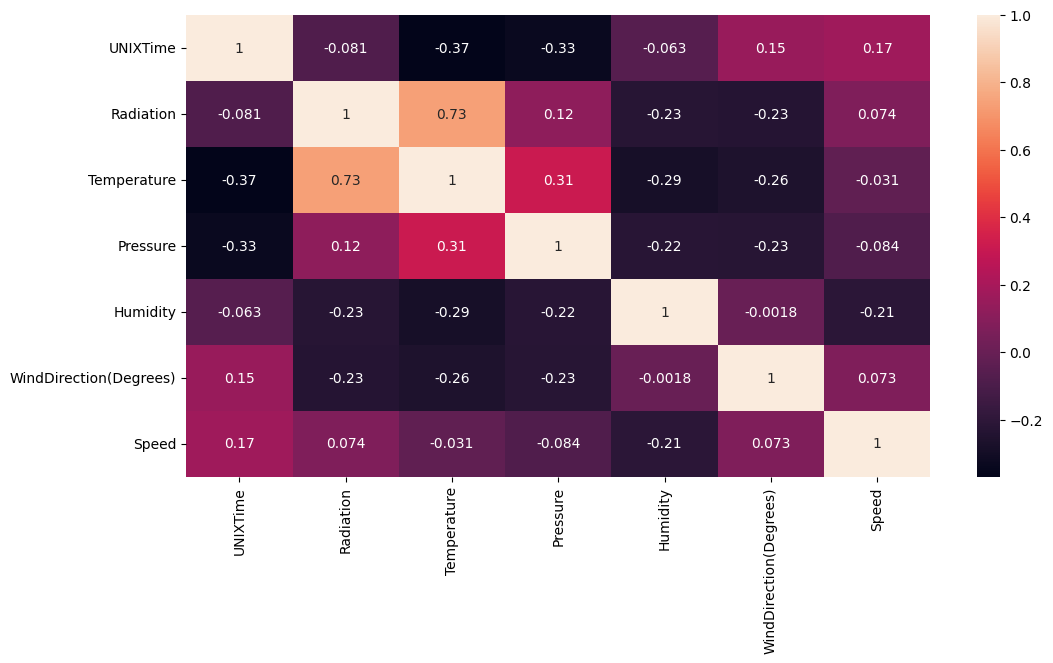

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(data_solar.drop(['Data', 'Time', 'TimeSunRise', 'TimeSunSet'], axis=1).corr(),annot=True)

<Axes: xlabel='Temperature', ylabel='Count'>

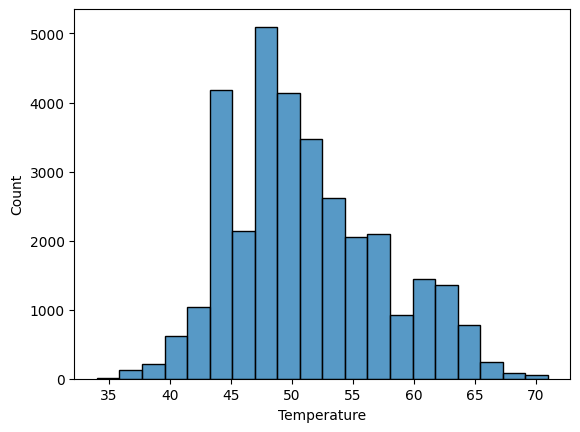

In [ ]:
sns.histplot(x=data_solar['Temperature'],bins=20)

<Axes: xlabel='Pressure', ylabel='Count'>

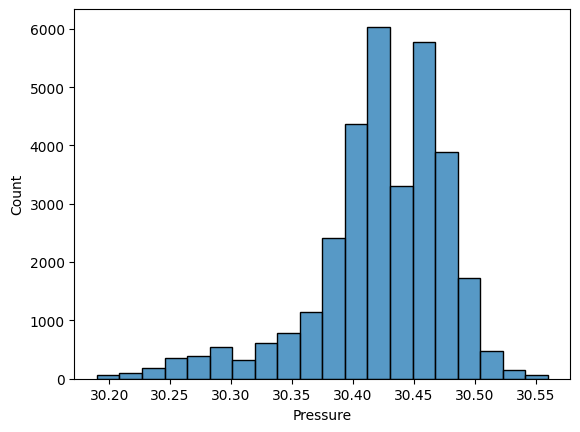

In [ ]:
sns.histplot(x=data_solar['Pressure'],bins=20)

<Axes: xlabel='Temperature', ylabel='Pressure'>

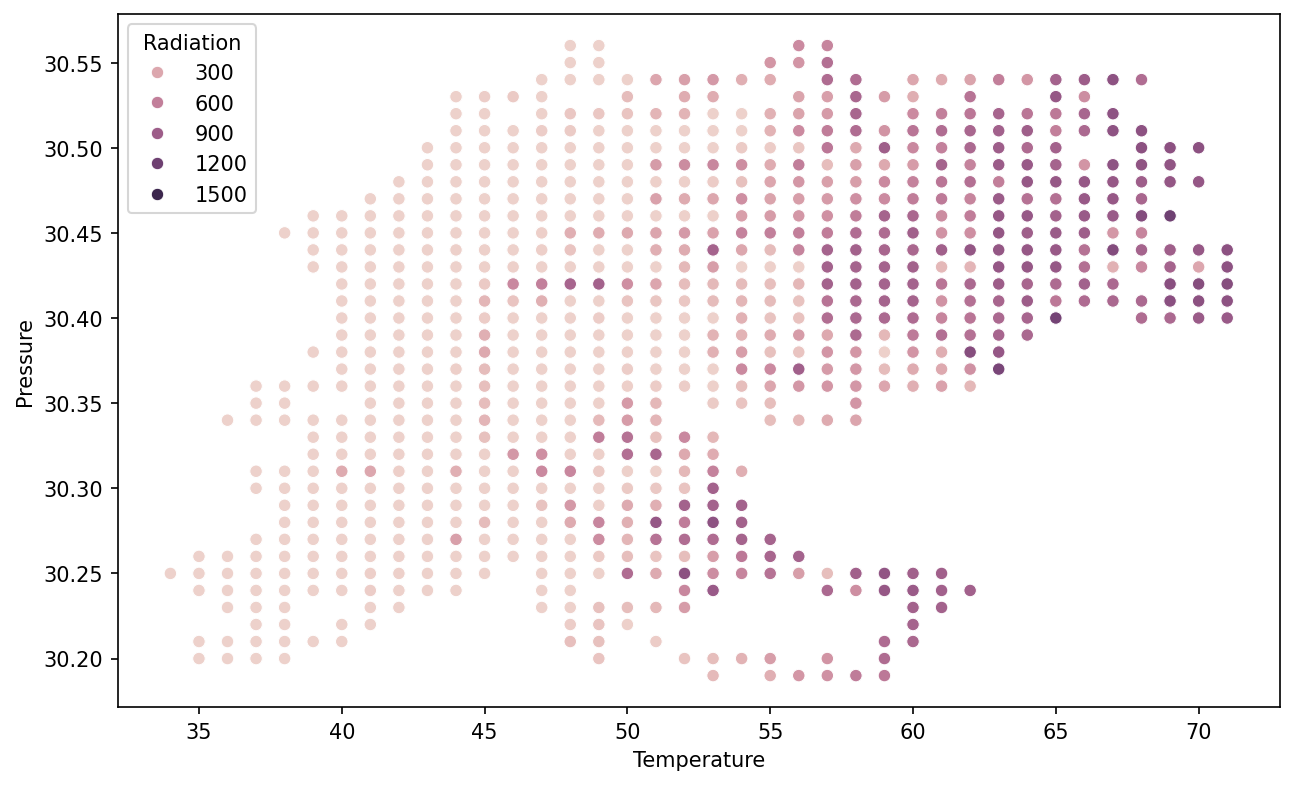

In [ ]:
plt.figure(figsize=(10,6),dpi=150)
sns.scatterplot(x=data_solar['Temperature'],y=data_solar['Pressure'],hue=data_solar['Radiation'])

<Axes: xlabel='WindDirection(Degrees)', ylabel='Count'>

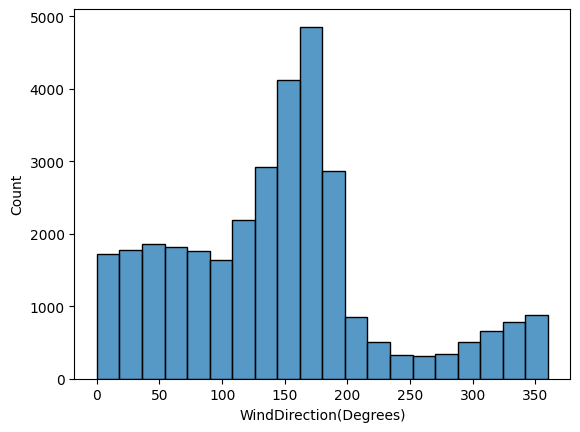

In [ ]:
sns.histplot(x=data_solar['WindDirection(Degrees)'],bins=20)

<Axes: xlabel='Humidity', ylabel='Count'>

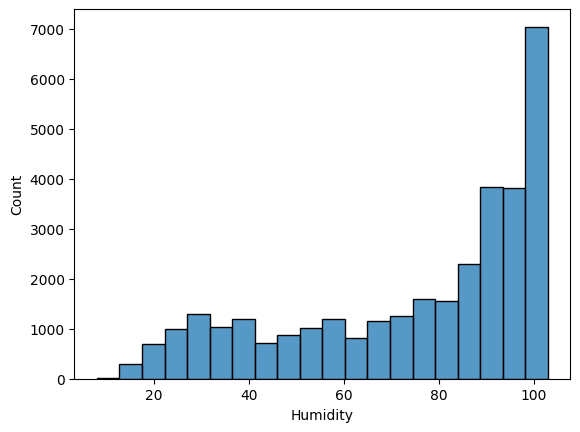

In [ ]:
sns.histplot(x=data_solar['Humidity'],bins=20)

<Axes: xlabel='Speed', ylabel='Count'>

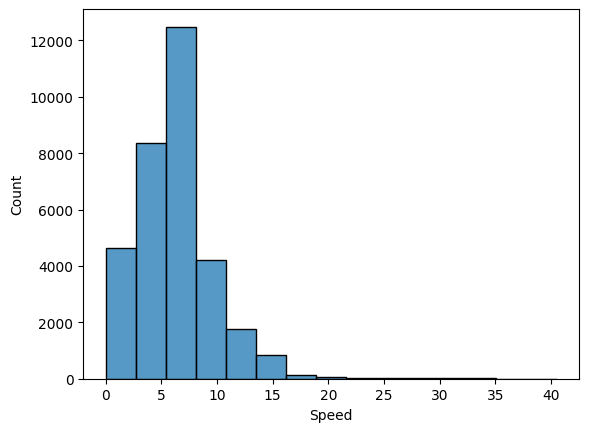

In [ ]:
sns.histplot(x=data_solar['Speed'],bins=15)

<Axes: xlabel='Speed', ylabel='WindDirection(Degrees)'>

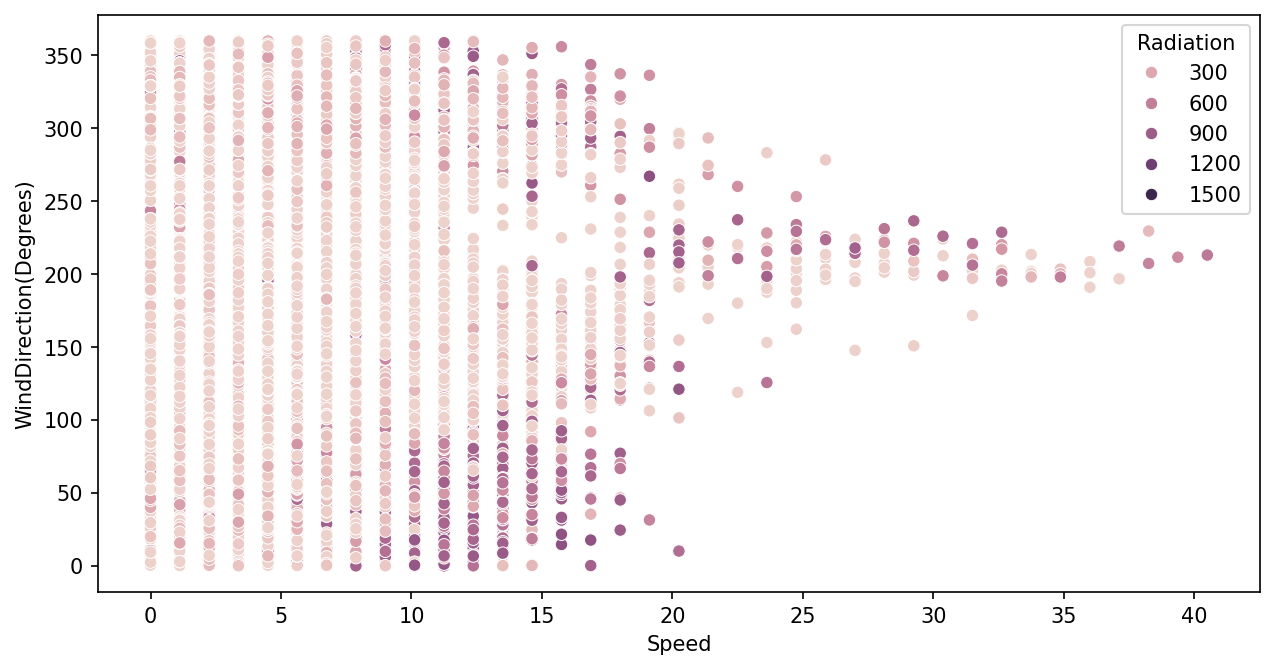

In [ ]:
plt.figure(figsize=(10,5),dpi=150)
sns.scatterplot(y=data_solar['WindDirection(Degrees)'],x=data_solar['Speed'],hue=data_solar['Radiation'])

<Axes: xlabel='Humidity', ylabel='Speed'>

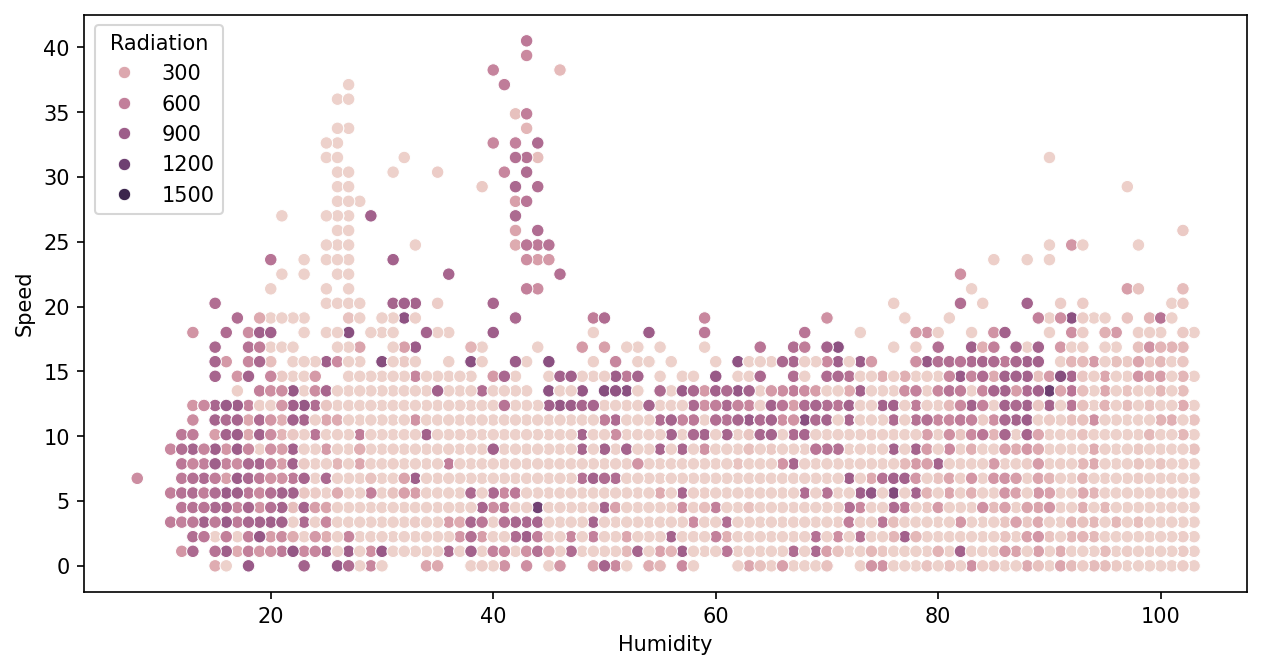

In [ ]:
plt.figure(figsize=(10,5),dpi=150)
sns.scatterplot(y=data_solar['Speed'],x=data_solar['Humidity'],hue=data_solar['Radiation'])

In [ ]:
X=data_solar.drop(['Data','Time','TimeSunRise','TimeSunSet','Radiation'],axis=1)

In [ ]:
y=data_solar['Radiation']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_, y_train, y_ = train_test_split(X, y, test_size=0.20, random_state=101)

In [ ]:
X_val, X_test, y_val, y_test = train_test_split(X_, y_, test_size=0.20, random_state=101)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()

In [ ]:
X_train=scaler.fit_transform(X_train)

In [ ]:
X_val=scaler.fit_transform(X_val)

In [ ]:
X_test=scaler.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [ ]:
RandomForest_model=RandomForestRegressor()
RandomForest_model.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
def report(model):
    preds = model.predict(X_val)
    MAE= mean_absolute_error(preds,y_val)
    MSE=mean_squared_error(preds,y_val)
    RMSE=np.sqrt(MSE)
    print('Mean Absolute Error: '+str(MAE))
    print('Root Mean Squared Error: '+str(RMSE))
    print("Test Score:" + str(model.score(X_val,y_val)))

In [ ]:
from sklearn.metrics import r2_score

# Generate predictions
y_pred = RandomForest_model.predict(X_test)

# Calculate metrics in original units
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [ ]:
    # Display results
    print(f"✅ Mean Squared Error (MSE): {mse:.4f}")
    print(f"✅ Mean Absolute Error (MAE): {mae:.4f}")
    print(f"✅ Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"✅ R-squared (R²): {r2:.4f}")

✅ Mean Squared Error (MSE): 17678.7936
✅ Mean Absolute Error (MAE): 69.0939
✅ Root Mean Squared Error (RMSE): 132.9616
✅ R-squared (R²): 0.8120


In [ ]:
print('Random Forest Regressor')
report(RandomForest_model)

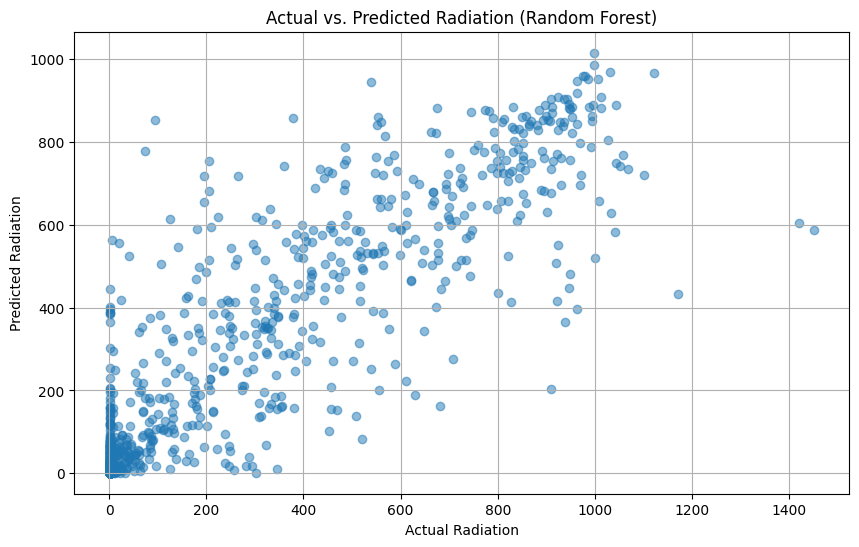

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Radiation")
plt.ylabel("Predicted Radiation")
plt.title("Actual vs. Predicted Radiation (Random Forest)")
plt.grid(True)
plt.show()